This notebook is a testbed for plotting various signals against an underlying asset

In [9]:
import numpy as np
import torch
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import Quant.Signals as qs

In [10]:
TICKER = "AAPL"
Close = yf.download(TICKER, start="2020-01-01")['Close'][TICKER]
Volume = yf.download(TICKER, start="2020-01-01")['Volume'][TICKER]

C:\Users\adamd\AppData\Local\Temp\ipykernel_1092\864959058.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Close = yf.download(TICKER, start="2020-01-01")['Close'][TICKER]
[*********************100%***********************]  1 of 1 completed
C:\Users\adamd\AppData\Local\Temp\ipykernel_1092\864959058.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Volume = yf.download(TICKER, start="2020-01-01")['Volume'][TICKER]
[*********************100%***********************]  1 of 1 completed


In [ ]:
MA10 = qs.moving_average(Close, window=10)
MA50 = qs.moving_average(Close, window=50)
MA10underMA50 = qs.crossover_signal(Close, fast_window=10, slow_window=50)
MA10underMA50_edge = qs.crossover_signal_edge(Close, fast_window=10, slow_window=50)
RSI = qs.RSI_normalized(Close, window=60)

VOL_MA_10 = qs.moving_average(Volume, window=10)
VOL_MA_50 = qs.moving_average(Volume, window=50)
Vol_regime = VOL_MA_10 / VOL_MA_50 - 1.0
Vol_regime = Vol_regime/ Vol_regime.std()


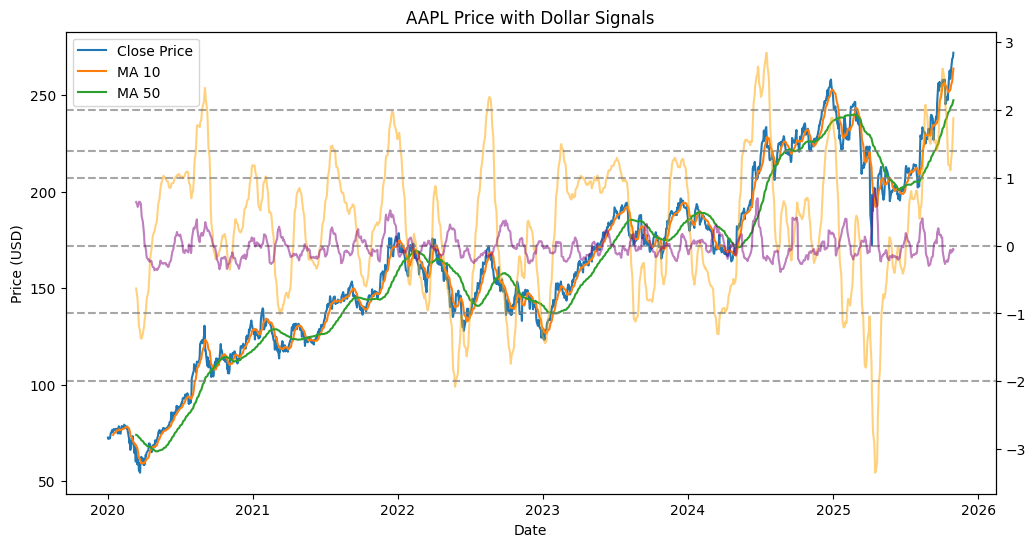

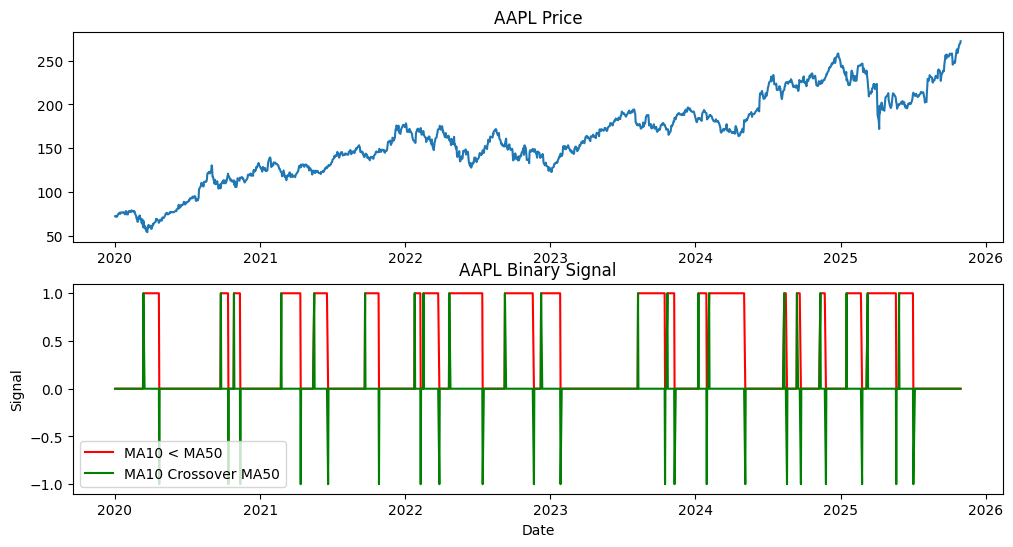

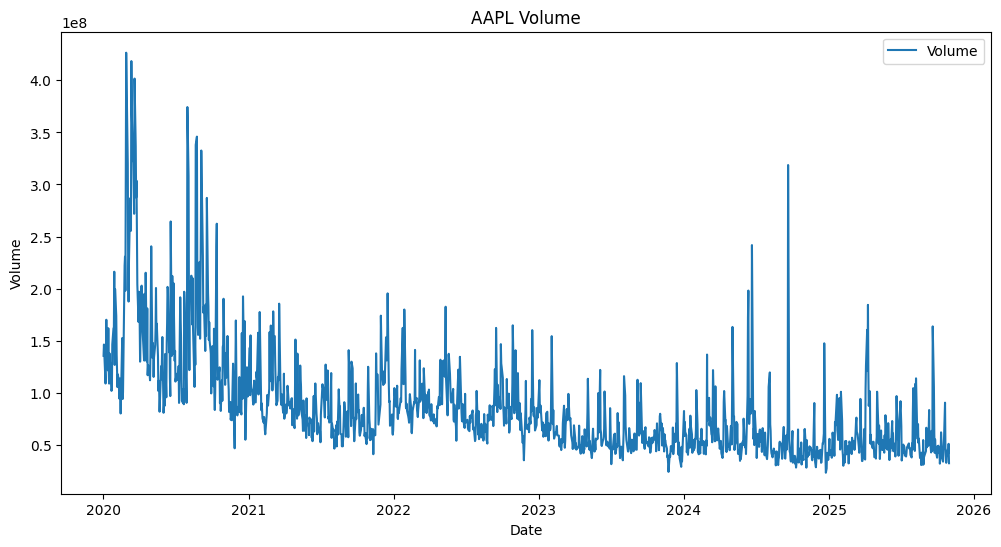

In [13]:
fig, dollarPlot = plt.figure(figsize=(12, 6)), plt.gca()
dollarPlot.plot(Close.index, Close, label='Close Price')
dollarPlot.plot(MA10.index, MA10, label='MA 10')
dollarPlot.plot(MA50.index, MA50, label='MA 50')
ax2 = dollarPlot.twinx()
ax2.plot((MA10-MA50)/(MA10-MA50).std(), label='MA10 - MA50', color='orange', alpha=0.5)
[ax2.axhline(y, color='gray', linestyle='--', alpha=0.7) for y in [-2, -1, 0, 1, 1.4, 2]]
ax2.plot(VOL_MA_10/VOL_MA_50 - 1 , label='VOL MA10 / VOL MA50', color='purple', alpha=0.5)
# ax2.plot(RSI, label='RSI', color='green', alpha=0.5)
# ax2.axhline(70, color='red', linestyle='--', alpha=0.7)
# ax2.axhline(30, color='blue', linestyle='--', alpha=0.7)

dollarPlot.set_title(f"{TICKER} Price with Dollar Signals")
dollarPlot.set_xlabel("Date")
dollarPlot.set_ylabel("Price (USD)")
dollarPlot.legend()

plt.show()


# Plot Ticker on top and binary signal below
fig, binaryPlot = plt.subplots(2, 1, figsize=(12, 6))
binaryPlot[0].plot(Close.index, Close, label='Close Price')
binaryPlot[0].set_title(f"{TICKER} Price")
binaryPlot[1].plot(MA10underMA50.index, MA10underMA50, label='MA10 < MA50', color='red')
binaryPlot[1].plot(MA10underMA50_edge.index, MA10underMA50_edge, label='MA10 Crossover MA50', color='green')
binaryPlot[1].set_title(f"{TICKER} Binary Signal")
binaryPlot[1].set_xlabel("Date")
binaryPlot[1].set_ylabel("Signal")
binaryPlot[1].legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(Volume, label='Volume')
plt.title(f"{TICKER} Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()